## **Titanic Dataset Analysis using Logistic Regression**
### - **by Harrish Ragavendar S**

### **Importing the Modules**

In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

### **Reading the Dataset**

In [262]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [263]:
df.shape

(891, 12)

### **Analyzing the Dataset**

<AxesSubplot:xlabel='Survived', ylabel='count'>

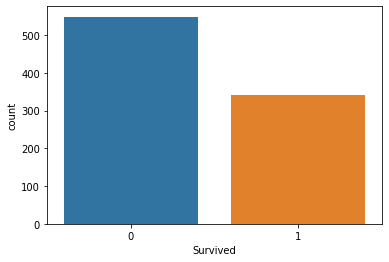

In [264]:
sns.countplot(x="Survived",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

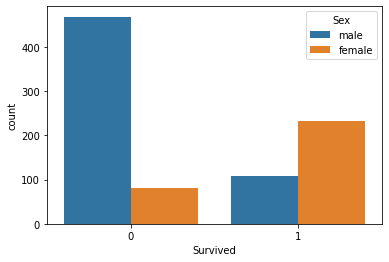

In [265]:
sns.countplot(x="Survived",hue="Sex",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

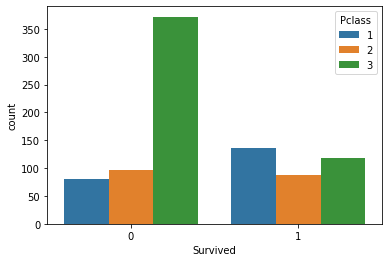

In [266]:
sns.countplot(x="Survived",hue="Pclass",data=df)

<AxesSubplot:ylabel='Frequency'>

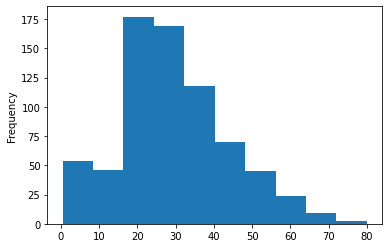

In [267]:
df['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

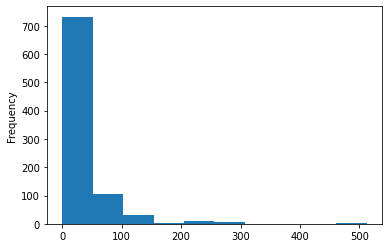

In [268]:
df['Fare'].plot.hist()

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

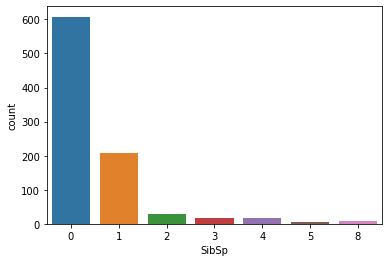

In [270]:
sns.countplot(x="SibSp",data=df)

### **Data Wrangling**

In [271]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

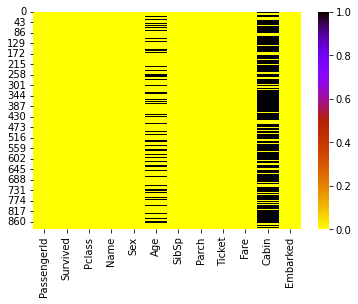

In [272]:
sns.heatmap(df.isna(),cmap="gnuplot_r")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

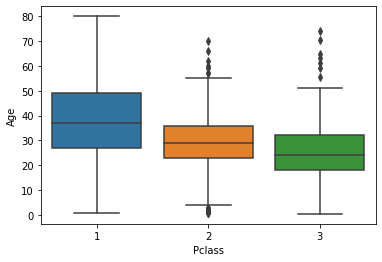

In [273]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [274]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [275]:
df.drop("Cabin",axis=1,inplace=True)

In [276]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [277]:
df.dropna(inplace=True)

In [278]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

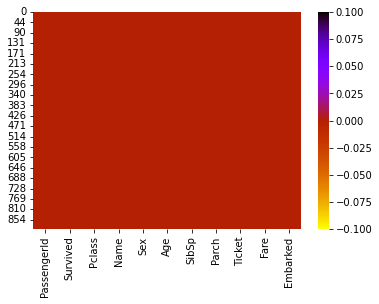

In [279]:
sns.heatmap(df.isnull(),cmap="gnuplot_r")

In [280]:
Sex = pd.get_dummies(df['Sex'],drop_first=True)

In [281]:
Embarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [282]:
Pclass = pd.get_dummies(df['Pclass'],drop_first=True)

In [283]:
df = pd.concat([df,Sex,Embarked,Pclass],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [284]:
df.drop(["PassengerId","Pclass","Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [285]:
df.rename(columns = {'male':'Gender'}, inplace = True)
df.rename(columns = {2:'Class 2'}, inplace = True)
df.rename(columns = {3:'Class 3'}, inplace = True)

0->Female 1->Male

In [286]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Gender,Q,S,Class 2,Class 3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


### **Splitting the data as test and train datasets**

In [287]:
X = df.drop("Survived",axis=1)
y = df["Survived"]

In [288]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [289]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [290]:
predicted = lr.predict(X_test)

In [291]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
classification_report(y_test,predicted)

'              precision    recall  f1-score   support\n\n           0       0.80      0.86      0.83       142\n           1       0.76      0.68      0.72        93\n\n    accuracy                           0.79       235\n   macro avg       0.78      0.77      0.77       235\nweighted avg       0.79      0.79      0.78       235\n'

In [292]:
confusion_matrix(y_test,predicted)

array([[122,  20],
       [ 30,  63]], dtype=int64)

In [293]:
accuracy_score(y_test,predicted)

0.7872340425531915

### **Conclusion**

### *Hence our Logistic Regression Model has an accuracy of nearly 79 %.*
---